plot
=====

import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import glob
import datetime
import warnings
warnings.filterwarnings('ignore')
import os
current_directory = os.getcwd()
print("현재 디렉토리:", current_directory)

현재 디렉토리: c:\apps\Project1


In [2]:
from matplotlib import font_manager
# 맑은고딕 폰트 찾기
font_path = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
malgun_font = [font for font in font_path if 'malgun' in font.lower()]
plt.rcParams['axes.unicode_minus'] = False
if malgun_font:
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    print("맑은고딕 폰트가 시스템에 설치되어 있지 않습니다. 다른 한글 폰트를 사용해보세요.")

fix files

In [5]:
import  aspose.cells 
from aspose.cells import Workbook
workbook = Workbook("./long_straddle.xls")
workbook.save("./long_straddle.xls")
workbook = Workbook("./long_strangle.xls")
workbook.save("./long_strangle.xls")
workbook = Workbook("./short_straddle.xls")
workbook.save("./short_straddle.xls")
workbook = Workbook("./short_strangle.xls")
workbook.save("./short_strangle.xls")

RuntimeError: Proxy error(CellsException): The file format and extension do not match.

load files

In [13]:
long_straddle = pd.read_excel('./long_straddle.xls', engine='xlrd')
long_strangle = pd.read_excel('./long_strangle.xls', engine='xlrd')
short_straddle = pd.read_excel('./short_straddle.xls', engine='xlrd')
short_strangle = pd.read_excel('./short_strangle.xls', engine='xlrd')

In [14]:
long_straddle.columns = ['KOSPI200', '현재이론손익', '중간이론손익', '만기손익']
long_strangle.columns = ['KOSPI200', '현재이론손익', '중간이론손익', '만기손익']
short_straddle.columns = ['KOSPI200', '현재이론손익', '중간이론손익', '만기손익']
short_strangle.columns = ['KOSPI200', '현재이론손익', '중간이론손익', '만기손익']

In [9]:
long_straddle

,KOSPI200,현재이론손익,중간이론손익,만기손익
0,345.0,2496000,2015000,1835000
1,344.9,2476000,1992000,1809000
2,344.8,2455000,1969000,1785000
3,344.7,2435000,1945000,1759000
4,344.6,2415000,1921000,1735000
...,...,...,...,...
396,305.4,1867000,1665000,1735000
397,305.3,1887000,1688000,1759000
398,305.2,1906000,1711000,1785000
399,305.1,1925000,1736000,1809000


In [10]:
long_strangle

,KOSPI200,현재이론손익,중간이론손익,만기손익
0,345.0,2409000,1894000,1675000
1,344.9,2390000,1871000,1650000
2,344.8,2370000,1847000,1625000
3,344.7,2351000,1825000,1600000
4,344.6,2331000,1802000,1575000
...,...,...,...,...
396,305.4,1822000,1562000,1575000
397,305.3,1841000,1585000,1600000
398,305.2,1859000,1607000,1625000
399,305.1,1878000,1629000,1650000


In [15]:
short_straddle

,KOSPI200,현재이론손익,중간이론손익,만기손익
0,345.0,-2492000,-2015000,-1835000
1,344.9,-2471000,-1991000,-1809000
2,344.8,-2452000,-1967000,-1785000
3,344.7,-2431000,-1944000,-1759000
4,344.6,-2411000,-1921000,-1735000
...,...,...,...,...
396,305.4,-1864000,-1663000,-1735000
397,305.3,-1883000,-1687000,-1759000
398,305.2,-1902000,-1711000,-1785000
399,305.1,-1921000,-1734000,-1809000


In [12]:
short_strangle

,KOSPI200,현재이론손익,중간이론손익,만기손익
0,345.0,-2412000,-1895000,-1675000
1,344.9,-2392000,-1873000,-1650000
2,344.8,-2373000,-1850000,-1625000
3,344.7,-2353000,-1826000,-1600000
4,344.6,-2334000,-1803000,-1575000
...,...,...,...,...
396,305.4,-1818000,-1559000,-1575000
397,305.3,-1836000,-1582000,-1600000
398,305.2,-1854000,-1605000,-1625000
399,305.1,-1873000,-1628000,-1650000


# plots

long_straddle

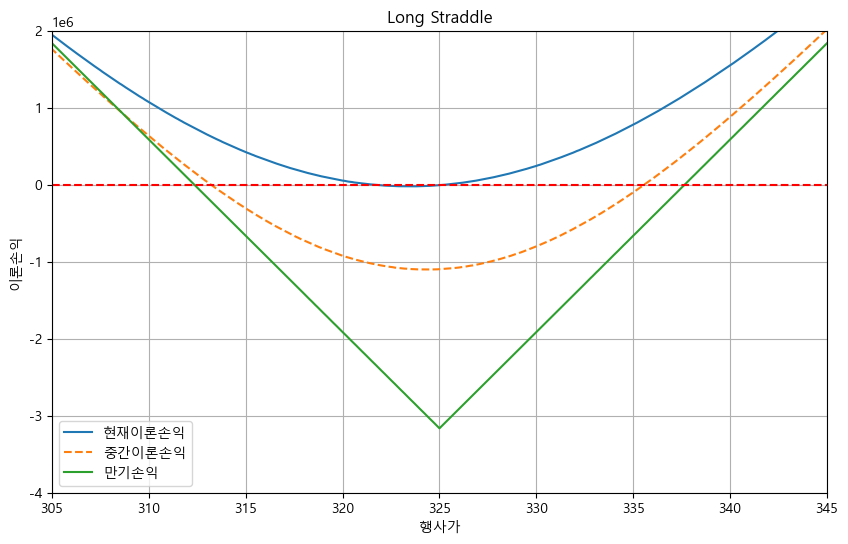

In [35]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(long_straddle['KOSPI200'], long_straddle['현재이론손익'], label='현재이론손익', linestyle='solid')
plt.plot(long_straddle['KOSPI200'], long_straddle['중간이론손익'], label='중간이론손익', linestyle='dashed')
plt.plot(long_straddle['KOSPI200'], long_straddle['만기손익'], label='만기손익', linestyle='solid')

# plt.xticks(data.index[::int(len(data.index))/100], rotation=10)
# plt.yticks(data.index[::int(len(data.index)/10)], rotation=45)
plt.xlim(305, 345)
plt.ylim(-4000000, 2000000)
plt.axhline(0, color='r', linestyle='--')
plt.hlines(0, 1.0, 2.5, color='gray', linestyle='solid', linewidth=3)
# Labeling the axes
plt.xlabel('행사가')
plt.ylabel('이론손익')
plt.title('Long Straddle')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

long_strangle

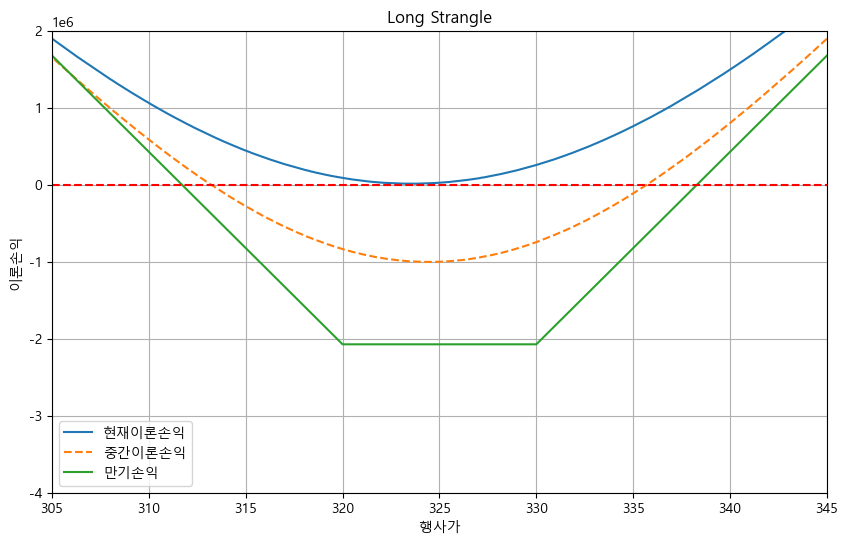

In [36]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(long_strangle['KOSPI200'], long_strangle['현재이론손익'], label='현재이론손익', linestyle='solid')
plt.plot(long_strangle['KOSPI200'], long_strangle['중간이론손익'], label='중간이론손익', linestyle='dashed')
plt.plot(long_strangle['KOSPI200'], long_strangle['만기손익'], label='만기손익', linestyle='solid')

# plt.xticks(data.index[::int(len(data.index))/100], rotation=10)
# plt.yticks(data.index[::int(len(data.index)/10)], rotation=45)
plt.xlim(305, 345)
plt.ylim(-4000000, 2000000)
plt.axhline(0, color='r', linestyle='--')
plt.hlines(0, 1.0, 2.5, color='gray', linestyle='solid', linewidth=3)
# Labeling the axes
plt.xlabel('행사가')
plt.ylabel('이론손익')
plt.title('Long Strangle')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

short_straddle

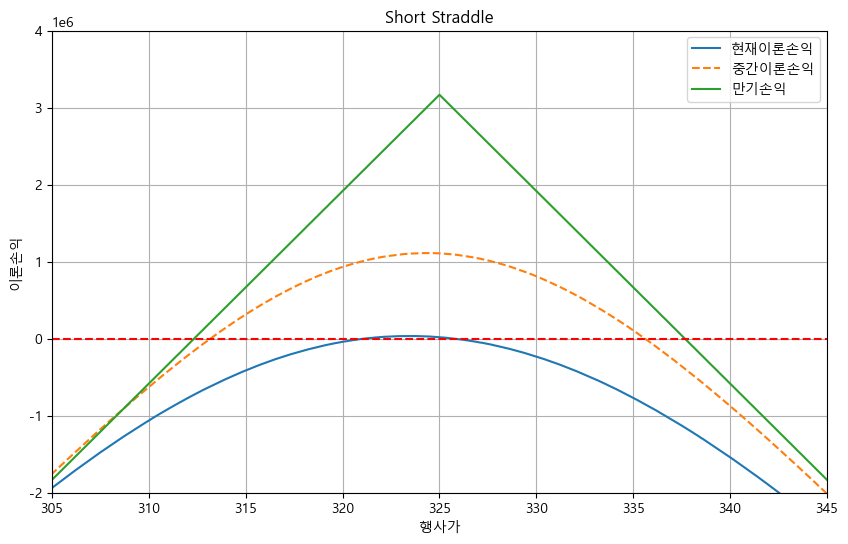

In [37]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(short_straddle['KOSPI200'], short_straddle['현재이론손익'], label='현재이론손익', linestyle='solid')
plt.plot(short_straddle['KOSPI200'], short_straddle['중간이론손익'], label='중간이론손익', linestyle='dashed')
plt.plot(short_straddle['KOSPI200'], short_straddle['만기손익'], label='만기손익', linestyle='solid')

# plt.xticks(data.index[::int(len(data.index))/100], rotation=10)
# plt.yticks(data.index[::int(len(data.index)/10)], rotation=45)
plt.xlim(305, 345)
plt.ylim(-2000000, 4000000)
plt.axhline(0, color='r', linestyle='--')
plt.hlines(0, 1.0, 2.5, color='gray', linestyle='solid', linewidth=3)
# Labeling the axes
plt.xlabel('행사가')
plt.ylabel('이론손익')
plt.title('Short Straddle')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

short_strangle

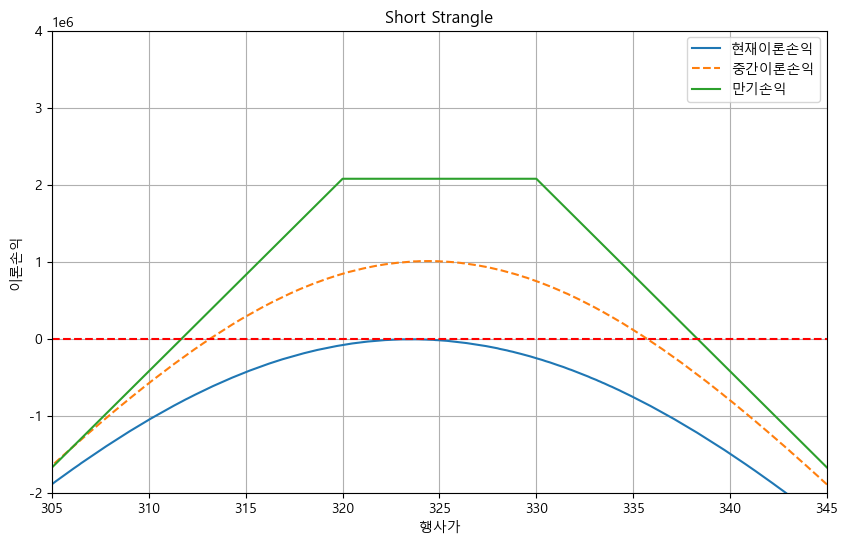

In [38]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(short_strangle['KOSPI200'], short_strangle['현재이론손익'], label='현재이론손익', linestyle='solid')
plt.plot(short_strangle['KOSPI200'], short_strangle['중간이론손익'], label='중간이론손익', linestyle='dashed')
plt.plot(short_strangle['KOSPI200'], short_strangle['만기손익'], label='만기손익', linestyle='solid')

# plt.xticks(data.index[::int(len(data.index))/100], rotation=10)
# plt.yticks(data.index[::int(len(data.index)/10)], rotation=45)
plt.xlim(305, 345)
plt.ylim(-2000000, 4000000)
plt.axhline(0, color='r', linestyle='--')
plt.hlines(0, 1.0, 2.5, color='gray', linestyle='solid', linewidth=3)
# Labeling the axes
plt.xlabel('행사가')
plt.ylabel('이론손익')
plt.title('Short Strangle')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()